# *Starbucks Rewards Mobile App Offers*

## Introduction

### *Loading Libraries*

In [214]:
# Importing Libraries

import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data Wrangling

**Data Wrangling steps:**
- Gather
- Acess
- Clean
    - Define
    - Code
    - Test

### *Gather Data*

In [215]:
# Importing data from json

portfolio_data = pd.read_json(
    "data/portfolio.json", orient='records', lines=True)

profile_data = pd.read_json("data/profile.json", orient='records', lines=True)

transcript_data = pd.read_json(
    "data/transcript.json", orient='records', lines=True)

### *Acess Data*

#### Sample Data

In [216]:
# Glimpse of data
portfolio_data.sample(10)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [217]:
profile_data.sample(10)

,gender,age,id,became_member_on,income
9496,M,54,0a3fe7f225ef42798190a1654b9a43ac,20180119,61000.0
86,F,74,2c5c63e5124e417b8504f76c868a4190,20151224,107000.0
14156,M,21,1806c09a830840f9983b0443f687a4ba,20171027,71000.0
15294,F,65,f89b838f0225472fa5d191e25778f8e4,20180207,70000.0
1847,M,54,e75780657f42498c8b16c915ad2fc209,20180407,69000.0
4975,F,20,b9f66dfe212c45338adfab7ff215e362,20160522,64000.0
2777,M,27,9045d97579294e3287696d71cad9c68d,20160905,34000.0
12214,F,20,04fcbc5e1faf4b7bba20116ecb30ca17,20171011,46000.0
3054,F,63,0f46a272dd8b4b789e31f910653fc8f4,20160627,88000.0
4848,M,63,c0eda515b67c4aa99ca289db36cd0f3e,20180521,74000.0


In [218]:
transcript_data.sample(10)

,person,event,value,time
36512,df6c3af2b21049fe9e676c9599ccc0ef,transaction,{'amount': 21.26},72
100227,f1a6ec5e8ef7440b949169ef991cafe4,transaction,{'amount': 12.97},270
287584,a3f201002d1448b68f6b5ce6d34e461b,transaction,{'amount': 25.76},636
203952,4405bf5b70f44eb9b6ee3ab6a713f0cd,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},504
8181,3fa1eb81473c41459439cd5749c49cb4,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0
160923,1997b4c538804d42bac6d58c32ec26b4,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},408
119898,4957ce23e5594b26a7b374b20271ed47,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},336
302789,75ebf737270f4aed850374986aac7333,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,696
135959,398d2fec9c9f4d759c5565caf97d1f80,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},360
192229,c2b2d67d84494302a7aa517899b58da0,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},468


#### Info on the data

In [219]:
# Info of data
portfolio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [220]:
profile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [221]:
transcript_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


 #### Description of the data

In [222]:
portfolio_data.describe()

# low standard deviation that means similar reward and difficulty settings on offers.

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [223]:
profile_data.describe()

# Reasonable standard deviation of age
# High standard deviation in income

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [224]:
transcript_data.describe()

# Nothing to infer

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


#### Checking for duplicates

In [225]:
# Checking same offer ids which means same offer
portfolio_data.id.duplicated().sum()

# No duplicates in portfolio data

0

In [226]:
# Checking duplicates in profile data on customer id
profile_data.id.duplicated().sum()

# No duplicates

0

In [227]:
# Checking duplicates in transcript data on person(customer id)
transcript_data.person.duplicated().sum()

# These number of people have multiple orders.

289534

- **No duplicates in portfolio data**
- **No duplicates in profile data**
- **289534 number of people have multiple orders. What to do will be decided later depending on data.**

#### Checking for Null values

In [228]:
# Portfolio data
print(portfolio_data.isna().sum())

# No null values

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64


In [229]:
# Profile data
print(profile_data.isna().sum())

# Gender has null values
# Checking percentage of null values
print('\nPercentage of data missing: ', profile_data.gender.isna().sum() / profile_data.shape[0])

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

Percentage of data missing:  0.12794117647058822


In [230]:
# Transcript data
transcript_data.isna().sum()

# No null values

person    0
event     0
value     0
time      0
dtype: int64

- **No missing data in portfolio and transcript but about 13% gender data missing in profile and that can be removed.**
- This may increase as we have to merge data of profile and transcript.

### Access Summary

***Tidiness Issues***
- Portfolio data has channels in the form of list
- Transcript data has value column containg items in the form of dictionary.

***Quality Issues***
- Profile data has gender and income column containing null values
- became_member_on_column not in datetime format
- Renaming columns to merge data

### *Clean Data*

In [231]:
# Creating copies of the data
portfolio_data_temp = portfolio_data.copy()
profile_data_temp = profile_data.copy()
transcript_data_temp = transcript_data.copy()

**Define** 

***Portfolio data has channels in the form of list***

In [232]:
# Checking data
portfolio_data_temp

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


**Code**

In [233]:
# Creating dummy rows according to channel column
email = []
mobile = []
web = []
social = []

temp = []
for channel in portfolio_data_temp.channels:
    temp.extend(channel)
    
for channel in temp:
    portfolio_data_temp[channel] = portfolio_data_temp.channels.apply(lambda x : 1 if channel in x else 0)

In [234]:
# Dropping channels column as no longer neccessary
portfolio_data_temp.drop(['channels'], inplace = True, axis = 1)

**Test**

In [235]:
# Test
portfolio_data_temp

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


**Define** 

***Transcript data has value column containg items in the form of dictionary.***

In [236]:
# Checking data
transcript_data_temp.sample(10)

,person,event,value,time
140885,896a5bab4952449ba3c972fd71aa9f30,transaction,{'amount': 3.52},372
78858,0f12659af9ed4251a2b4c8ade57133f2,transaction,{'amount': 7.25},192
139398,938db8510d784474b1229747751ff27c,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,366
296585,5115fdb314fe41619fda3e5d8060a8b5,transaction,{'amount': 18.88},672
204971,66af9e9ba5224128a37f2b0db9f7c982,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},504
233544,61d78b3d76d742b5b50f5f8379c21cf3,offer completed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d...,540
77575,83de7542018d455d9afa423626d7f5d3,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},192
272583,5164a5b8f90d4d4d8404d645af18193d,transaction,{'amount': 18.38},600
168777,c34b2bbea66543e6959258063efe9fbc,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},414
68846,c5756832e20341c7a8b959046223e420,transaction,{'amount': 1.98},168


**Code**

In [237]:
temp = list()
for item in  transcript_data_temp.value:
    temp.append(list(item.keys()))

new_temp = []
for item in temp:
    new_temp.extend(item)
    
types = list(set(new_temp))
print(types)

['reward', 'amount', 'offer id', 'offer_id']


In [238]:
transcript_data_temp.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

#### If offer is viewed or received there is no underscore in `offer id` and if offer completed there is underscore in `offer_id`.

In [239]:
for type in types:
    transcript_data_temp[type] = transcript_data_temp.value.apply(lambda x: x.get(type, 0))    

In [240]:
# Dropping value column
transcript_data_temp.drop(['value'], axis = 1, inplace = True)

In [241]:
# Since we can see reward only occurred if offer is used
# We can merge offer_ids in one column and differ between them on the basis of reward or event type
offer_id = []
for i in range(transcript_data_temp.shape[0]):
    offer_id.append(transcript_data_temp['offer id'][i] or transcript_data_temp['offer_id'][i])
        

transcript_data_temp['offer_id'] = offer_id

In [242]:
transcript_data_temp.sample(20)

,person,event,time,reward,amount,offer id,offer_id
273828,3478c81d15234db3b702cefcf7c4afbe,transaction,600,0,15.96,0,0
301238,6d45fac16b3d477e822bb9147b3238a9,transaction,690,0,0.32,0,0
77637,1db3570ae60246d9ab96bf03f04b1baf,offer viewed,192,0,0.00,ae264e3637204a6fb9bb56bc8210ddfd,ae264e3637204a6fb9bb56bc8210ddfd
42638,202089fa67c3493fb14b0d882713b9bd,transaction,102,0,16.44,0,0
55627,ef8c6bc12af4497b8fe37646bd97f3e4,offer received,168,0,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9,9b98b8c7a33c4b65b9aebfe6a799e6d9
78439,99d795545dbb4837b7ed00644ffbd367,offer viewed,192,0,0.00,2906b810c7d4411798c6938adc9daaa5,2906b810c7d4411798c6938adc9daaa5
156668,9c7b048269ec4afd9205201a8e386c22,offer received,408,0,0.00,5a8bc65990b245e5a138643cd4eb9837,5a8bc65990b245e5a138643cd4eb9837
102122,f7ebbbab571d44ec883575b11009be2f,transaction,282,0,2.44,0,0
182792,13d9215510ae4f5087c6d26485656ab0,transaction,444,0,13.68,0,0
288237,3d4ceca8f12848a28c346e9067470b05,transaction,642,0,1.26,0,0


In [243]:
# Deleting offer_id_viewed and offer_id_used
transcript_data_temp.drop(['offer id'], axis = 1, inplace = True)

# Replacing 0 in offer_id with np.nan
transcript_data_temp.offer_id.replace(0, np.nan, inplace = True)

**Test**

In [245]:
transcript_data_temp.sample(10)

,person,event,time,reward,amount,offer_id
230724,6ef732d213f2406fb1af286e738df9e2,transaction,534,0,3.94,NaN
90776,253928e13e194249af6f2ff4003498cb,offer completed,234,5,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9
14240,b4fab356e0a94cd3912b53c475573909,transaction,0,0,9.49,NaN
228357,b6fc6275ba344389964515ce3a8fe7fe,transaction,528,0,0.87,NaN
149014,69a2ee5872384fb6a0bf2d63a5db9574,offer completed,402,5,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9
170107,8d689f719e0b42edb5947f381f159cb1,transaction,414,0,19.32,NaN
137784,e085ef39038b4291976796dfc5f1dd3a,transaction,366,0,4.02,NaN
58721,a05d5de8d4314ec19162578f67af3fee,offer received,168,0,0.00,9b98b8c7a33c4b65b9aebfe6a799e6d9
125835,9f83b1bf4fba46f48d0b1e1c63765f94,offer viewed,336,0,0.00,fafdcd668e3743c1bb461111dcafc2a4
271283,54ce16dc2b7b4fbb8d540a7d1161f92e,transaction,594,0,0.48,NaN


**Define** 

***Profile data has gender and income column containing null values***

In [248]:
profile_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


#### *Checking gender column*

In [249]:
print(profile_data_temp.gender.unique())
print(profile_data_temp.gender.isna().sum())

[None 'F' 'M' 'O']
2175


***Checking Income Column percentage of Null values***

In [250]:
profile_data_temp.income.isna().sum() / profile_data_temp.shape[0]

# 12.7 % data is missing that means we can fill them with mean or median

0.12794117647058822

In [251]:
profile_data_temp.describe()

,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


#### *Checking if data is skewed*

0    73000.0
dtype: float64 64000.0


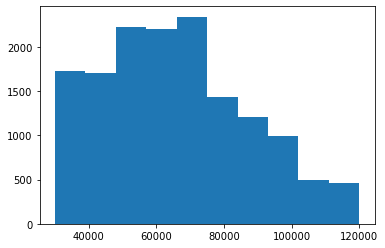

In [252]:
plt.hist(profile_data_temp.income)

# data is skewed filling it median or mode # median

print(profile_data_temp.income.mode(), profile_data_temp.income.median())

**Code**

#### *Filling Null Values with median* 

In [253]:
profile_data_temp.income.fillna(value = profile_data_temp.income.median(), inplace = True)

#### *Removing Null values with gender is None*

In [254]:
profile_data_temp.dropna(inplace = True)

**Test**

In [255]:
# Info of the data
profile_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


#### Define

***`became_member_on_column` not in datetime format***

In [256]:
profile_data_temp.sample(10)

,gender,age,id,became_member_on,income
12171,M,60,5baef2b5cb3a4aee8534e0d4a2e399e4,20180111,31000.0
1926,M,82,82f1d31dc1a340f58262316928882210,20171127,74000.0
8205,M,74,c87f130483ac4d95bce58e5e96c2e0b5,20150921,50000.0
12980,F,32,50a2c5e0f8b4414fa10bd868b0af5492,20160303,48000.0
16322,F,80,31143749023b4c86a17f2842eeb42232,20151218,72000.0
6419,F,61,d18d4dffd7324184928d1e918fdfcd8c,20151220,93000.0
15190,M,24,e745913337e64e93b3fb0bc734f93f96,20180707,70000.0
2489,F,24,7e4e0269683741eda11c7590db744bbd,20170802,44000.0
3589,F,45,40442f4692e4493d93ca58a439ff6b50,20160301,74000.0
16169,F,69,a8adc69426a34064b249082dd3d8cada,20171121,54000.0


#### Code

In [264]:
profile_data_temp['became_member_on'] = pd.to_datetime(profile_data_temp['became_member_on'], format='%Y%m%d')

#### Test

In [265]:
profile_data_temp.sample(10)

,gender,age,id,became_member_on,income
11422,F,70,dd718ccfdb534078b6dac7ed3ea78673,2017-06-25,74000.0
11995,F,56,b551e33de83147b694ff2ebf4d52d226,2018-01-30,77000.0
7865,F,54,c830751fd5de4453a105b0bd54aa070f,2018-04-19,79000.0
3613,M,90,1c8b3756397541c7b4dade350741a9ed,2018-04-09,38000.0
7243,F,55,84cf0f0cd78e423d9390df1d07a6590e,2017-07-28,108000.0
217,F,34,5b9c1a35c0144b6ab584e666dec7c531,2018-04-17,67000.0
10407,M,51,ad2c5a7237a647d5b717fc079283da18,2016-01-10,116000.0
14857,M,79,419bafec9bda42e58305020f3108358c,2018-01-21,91000.0
16693,F,68,d9903ac65490434fa512d62dd38d295d,2017-11-12,75000.0
8972,F,51,b9d7f0ab3ff34979965a826cd7e45f0d,2016-05-11,86000.0


In [266]:
profile_data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


#### Define

#### *Renaming columns for merging*

In [276]:
profile_data_temp.columns

Index(['gender', 'age', 'id', 'became_member_on', 'income'], dtype='object')

In [277]:
transcript_data_temp.columns

Index(['person', 'event', 'time', 'reward', 'amount', 'offer_id'], dtype='object')

In [278]:
portfolio_data_temp.columns

Index(['reward', 'difficulty', 'duration', 'offer_type', 'id', 'email',
       'mobile', 'social', 'web'],
      dtype='object')

#### Code

In [290]:
profile_data_temp.rename(columns={'id':'customer_id'}, inplace = True)

In [291]:
transcript_data_temp.rename(columns={'person':'customer_id'}, inplace = True)

In [292]:
portfolio_data_temp.rename(columns={'id':'offer_id'}, inplace = True)

#### Test

In [293]:
profile_data_temp.columns

Index(['gender', 'age', 'customer_id', 'became_member_on', 'income'], dtype='object')

In [294]:
transcript_data_temp.columns

Index(['customer_id', 'event', 'time', 'reward', 'amount', 'offer_id'], dtype='object')

In [295]:
portfolio_data_temp.columns

Index(['reward', 'difficulty', 'duration', 'offer_type', 'offer_id', 'email',
       'mobile', 'social', 'web'],
      dtype='object')

### Storing cleaned data to machine.

In [299]:
profile_data_temp.to_csv('data/cleaned_profile_data.csv')
transcript_data_temp.to_csv('data/cleaned_transcript_data.csv')
portfolio_data_temp.to_csv('data/cleaned_portfolio_data.csv')

In [275]:
profile_data_temp.columns.intersection(transcript_data_temp.columns, portfolio_data_temp.columns)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()